In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib notebook
warnings.filterwarnings('ignore')

## Dataset importing and cleaning

In [289]:
df_dict = {}

def org_columns(name):
    
    df = pd.read_csv(name + '.csv', header = [0, 1])
    
    cols_index = pd.MultiIndex.from_tuples(df.columns)
    
    level_0 = cols_index.get_level_values(0).values
    level_1 = cols_index.get_level_values(1).values    
                     
    for i in range(len(level_0)):
        if i == 0:
            level_0[i] = 'Team'
        elif i < 10:
            level_0[i] = 'Total'
        elif i < 19:
            level_0[i] = 'Home'
        else:
            level_0[i] = 'Away'
            
    new_columns = list(zip(level_0, level_1))
    df.columns = pd.MultiIndex.from_tuples(new_columns)
    
    df['League'] = name 
    df_dict[name] = df
    
    return df

seriea = org_columns('Italy')
bundesliga = org_columns('Germany')
epl = org_columns('England')
laliga = org_columns('Spain')
ligue = org_columns('France')

Goals :

1. Comapare the goals scored and conceded in the top 5 Leagues. (Bar plot)
2. Compare the goals scored by each team vs the ranking in table (Scatter)
3. Compare GD Vs ranking in the table (Scatter)
4. For each rank, find lowest and highest belonging to which league

## Getting and Visualizing data

In [487]:
#Goal 1
goals_sco = {}

for league in df_dict.keys():
    df = df_dict[league]
    gs = df['Total', 'G'].sum()
    
    goals_sco[league] = gs
    
goals = pd.Series(goals_sco)
goals

Italy      1019
Germany     973
England    1072
Spain       983
France      972
dtype: int64

<IPython.core.display.Javascript object>


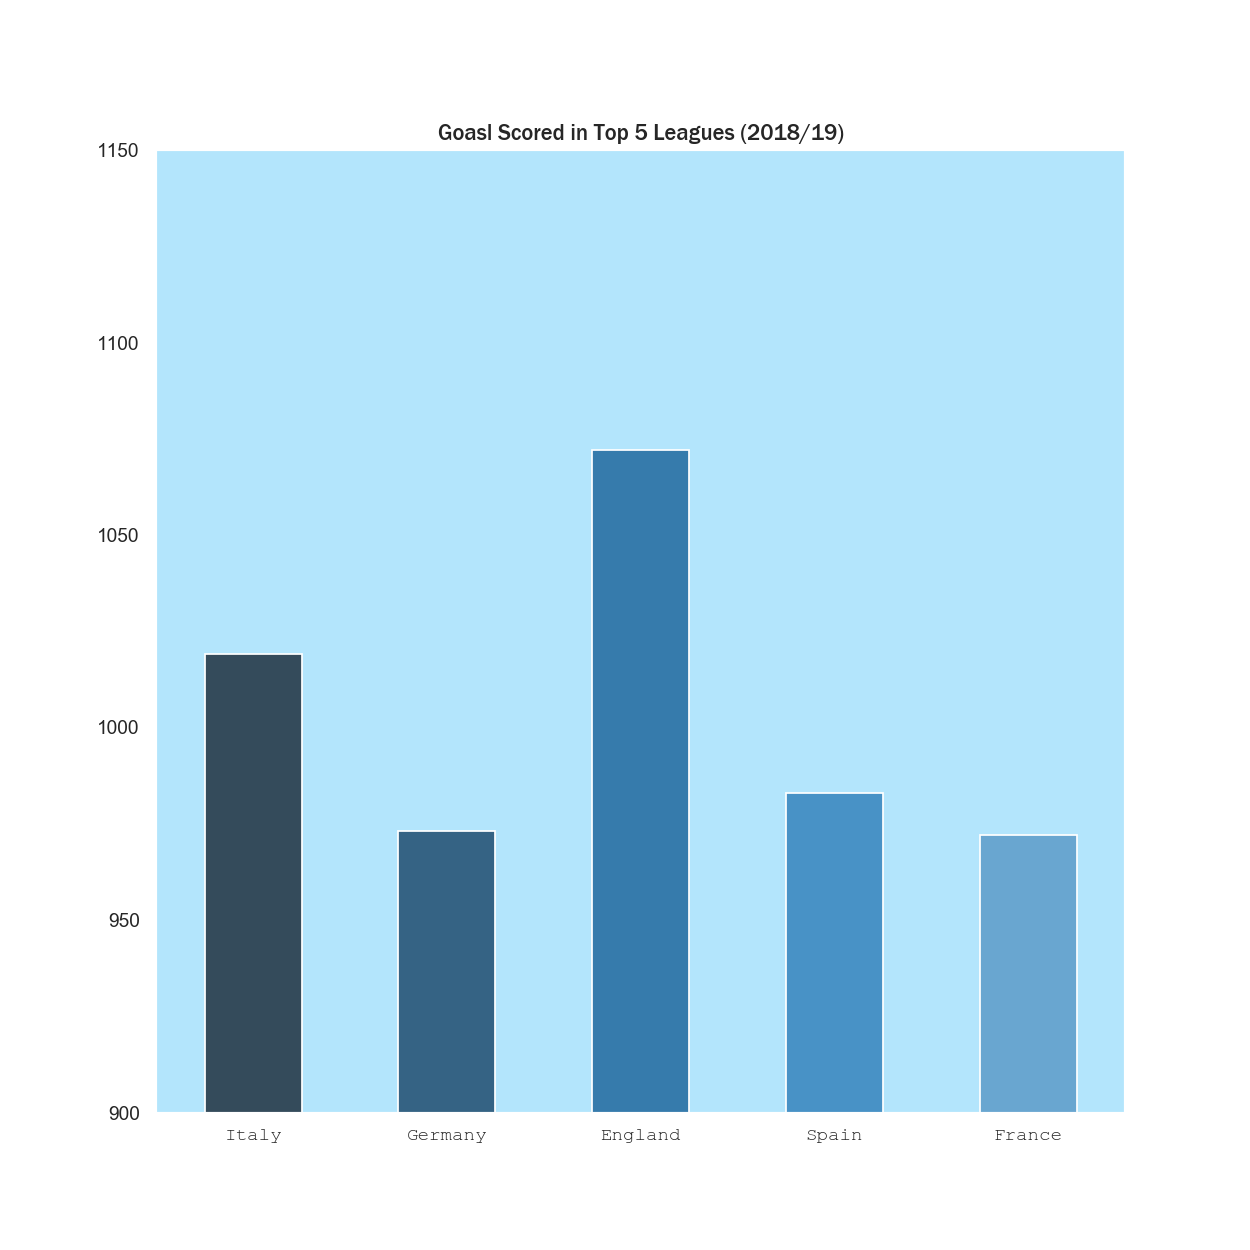

In [511]:
#Visualization

sns.set()
sns.set_style("dark", {"axes.facecolor": "#b3e5fc"})
sns.set_palette("Blues_d")

goals.plot.bar(figsize = (10, 10))
ax = plt.gca()

ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, family = "Courier New", fontsize = 11)
#ax.set_yticklabels(ax.get_yticklabels(), family = "Courier New",  fontsize = 11)

ax.set_title("Goasl Scored in Top 5 Leagues (2018/19)", family ="Franklin Gothic Medium", fontsize = 13 )

ax.set_ylim([900, 1150])

fig = plt.gcf()
fig.savefig('goals_scored.jpg', dpi = 500)

In [415]:
#Goal 2
#To compare the ranking vs Goals Scored (scatter)

def combine_data(dfs):
    
    dfs_vals = list(dfs.values())
    clean_dicts = [df[['Team', 'Total', 'League']] for df in dfs_vals]
    
    for df in clean_dicts:
        df.columns = df.columns.droplevel()
        
    df = pd.concat(clean_dicts)
    
    df = df.rename({'': 'League'}, axis = 'columns')
    return df
    

comb_df = combine_data(df_dict)
comb_df = comb_df.reset_index(drop = True)

<IPython.core.display.Javascript object>


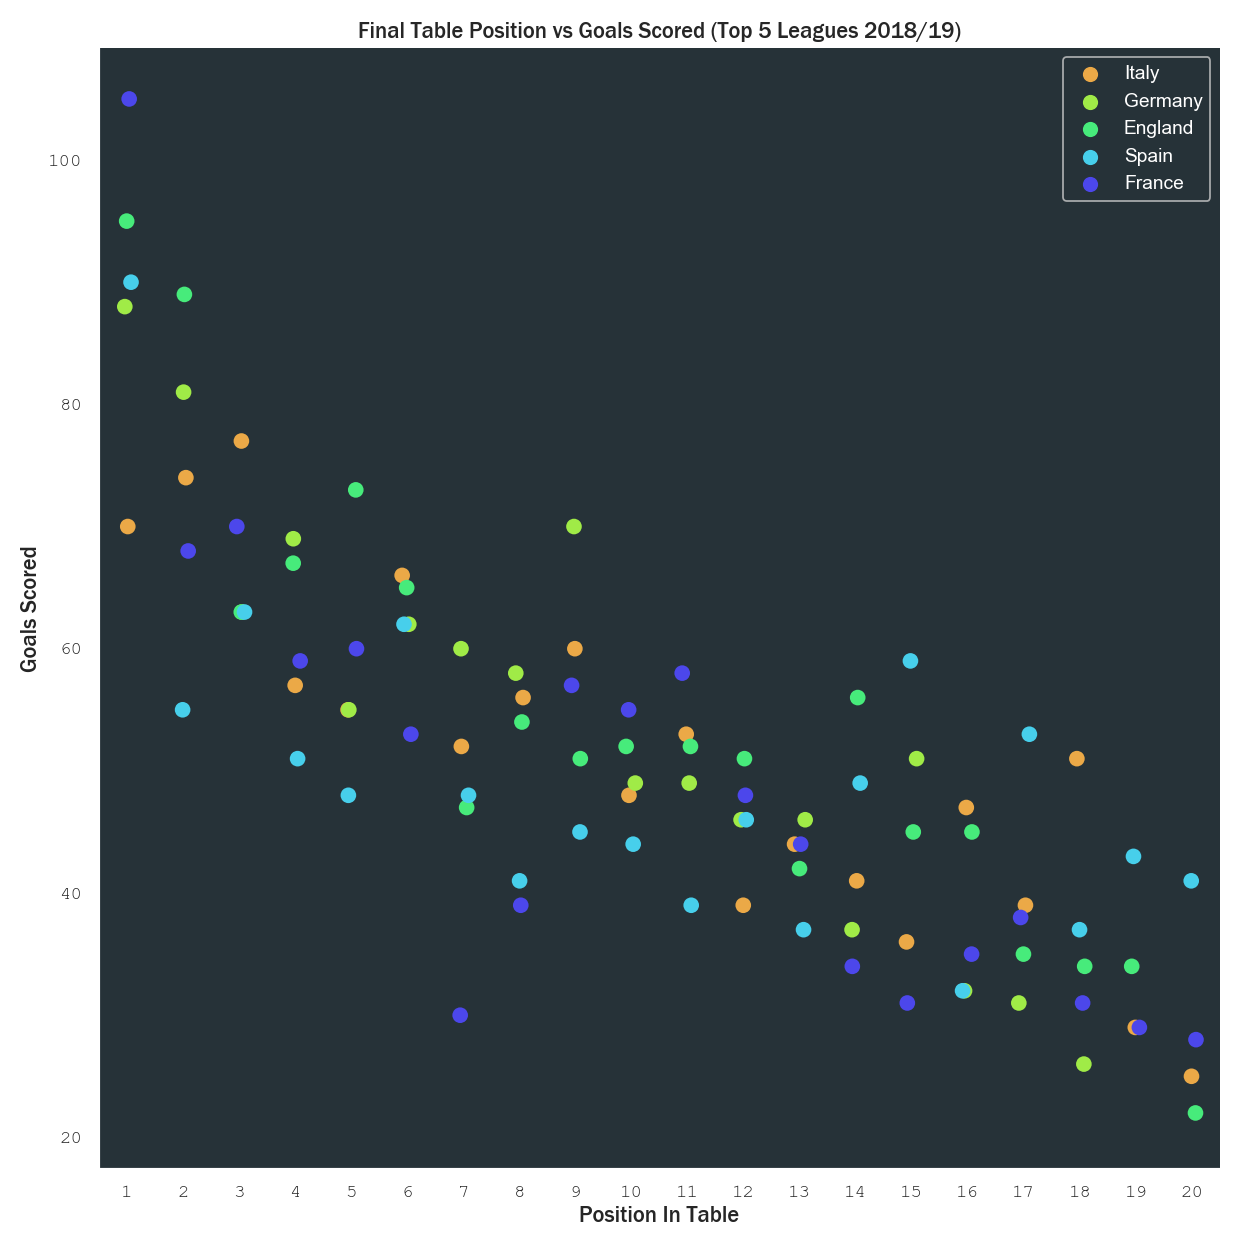

In [306]:
#Visualizing
sns.set()

pal = sns.hls_palette(7, h = 0.1, l=.6, s=0.8)
#sns.palplot(pal)
sns.set_style("dark", {"axes.facecolor": "#263238"})

sns.catplot(x = 'Rank', y = 'G', data = comb_df,  hue = "League", height = 10, palette= pal, s = 9, legend = None)

ax = plt.gca()

ax.set_xticklabels(ax.get_xticklabels(), family = "Courier New", fontsize = 11)
ax.set_yticklabels(ax.get_yticklabels(), family = "Courier New", fontsize = 11)

ax.set_xlabel("Position In Table", family = "Franklin Gothic Medium", fontsize = 13)
ax.set_ylabel("Goals Scored", family = "Franklin Gothic Medium", fontsize = 13)
ax.set_title("Final Table Position vs Goals Scored (Top 5 Leagues 2018/19)", family ="Franklin Gothic Medium", fontsize = 13 )

import pylab as plt

leg = plt.legend(loc = 'best')
for text in leg.get_texts():
    plt.setp(text, color = 'w')

plt.tight_layout()
fig = plt.gcf()

fig.savefig("goalcomparison_orig.jpg", dpi = 1000)

In [416]:
comb_df[comb_df['Rank'] == 7]

,Team,Rank,P,M,W,D,L,G,GA,GD,League
6,Torino,7,63,38,16,15,7,52,37,15,Italy
26,Eintracht Frankfurt,7,54,34,15,9,10,60,48,12,Germany
44,Wolverhampton,7,57,38,16,9,13,47,46,1,England
64,Espanyol,7,53,38,14,11,13,48,50,-2,Spain
84,Nice,7,56,38,15,11,12,30,35,-5,France


In [313]:
#Trying to find some interesting facts.
#For example, relegated Cardiff (18) scored more than 7th place Nice.
#Team A in some lower positions scored more than Team B in higher position

In [399]:
def compare_teams(df, rank_a, rank_b, option):
    
    if option == 'better':
        #Find all teams of rank_b or better who scored lesser than rank_a
        team = comb_df.iloc[comb_df[comb_df['Rank'] == rank_a]['G'].argmax()]

        print(team['Team'], team['G'])
        logic = (comb_df['Rank'] <= rank_b) & (comb_df['G'] <= team['G'])
        return comb_df[logic]
    
    else:
        #Find all teams of rank_b or worse who scored more than rank_a
        team = comb_df.iloc[comb_df[comb_df['Rank'] == rank_a]['G'].argmin() ]

        print(team['Team'], team['G'], team['Rank'])
        logic = (comb_df['Rank'] >= rank_b) & (comb_df['G'] >= team['G'])
        return comb_df[logic]

In [522]:
compare_teams(comb_df, 2, 17, 'worse')

#logic = (a['Rank'] ==20) | ((a['Rank'] ==18) & (a['League'] == 'Germany'))
#a[logic]

Athletico Madrid 55 2


,Team,Rank,P,M,W,D,L,G,GA,GD,League


Some interesting facts:

1. EPL has most goals scored (1072). France the least (972), just 1 short of Germany (who play 34 League games as compared to 38)
2. Empoli (Relegated, Serie A) has Scored more than Valencia (La Liga, 4th)
3. Nice (7th In Ligue 1) have scored fewer goals than 9 other Relegated teams from the top 5 leagues
4. Atletico Marid (2nd in La Liga) has scored just 2 more than Celta Vigo (17th in La Liga)
5. Among the 20 Positions in the combined table (consisting of all teams), La Liga have scored the least in 7 of those positions
6. Among the 20 Positions in the combined table (consisting of all teams), Bundesliga has scored the most in 5 of those positions (highest compared any other league)

Link to all data here.


In [507]:
#Goal 4: find lowest and highest for each rank, the league

low = comb_df.loc[comb_df.groupby(['Rank'], as_index= False)['G'].idxmin()]
high = comb_df.loc[comb_df.groupby(['Rank'], as_index= False)['G'].idxmax()]

In [449]:
a = low.groupby('League')['Team'].count()
b = high.groupby('League')['Team'].count()


In [509]:
b

League
England    4
France     3
Germany    5
Italy      4
Spain      4
Name: Team, dtype: int64

In [518]:
comb_df[comb_df['Rank'] == 20]['G'].sum()

116

In [520]:
df_dict['France']

Team Total                                    ...   Away  \
                   Team  Rank   P   M   W   D   L    G  GA  GD   ...   Rank   
0   Paris Saint-Germain     1  91  38  29   4   5  105  35  70   ...      1   
1                 Lille     2  75  38  22   9   7   68  33  35   ...      3   
2                  Lyon     3  72  38  21   9   8   70  47  23   ...      2   
3           St. Etienne     4  66  38  19   9  10   59  41  18   ...      5   
4             Marseille     5  61  38  18   7  13   60  52   8   ...      7   
5           Montpellier     6  59  38  15  14   9   53  42  11   ...      4   
6                  Nice     7  56  38  15  11  12   30  35  -5   ...     10   
7                 Reims     8  55  38  13  16   9   39  42  -3   ...      6   
8       Nimes Olympique     9  53  38  15   8  15   57  58  -1   ...     12   
9                Rennes    10  52  38  13  13  12   55  52   3   ...     11   
10           Strasbourg    11  49  38  11  16  11   58  48  10   ...      8   
11               Nantes    12  48  38  13   9  16   48  48   0   ...     14   
12               Angers    13  46  38  10  16  12   44  49  -5   ...      9   
13             Bordeaux    14  41  38  10  11  17   34  42  -8   ...     17   
14            Amiens SC    15  38  38   9  11  18   31  52 -21   ...     19   
15             Toulouse    16  38  38   8  14  16   35  57 -22   ...     15   
16               Monaco    17  36  38   8  12  18   38  57 -19   ...     13   
17                Dijon    18  34  38   9   7  22   31  60 -29   ...     18   
18                 Caen    19  33  38   7  12  19   29  54 -25   ...     16   
19             Guingamp    20  27  38   5  12  21   28  68 -40   ...     20   

                                   League  
     P   M   W  D   L   G  GA  GD          
0   38  19  12  2   5  42  25  17  France  
1   32  19   9  5   5  26  22   4  France  
2   32  19   9  5   5  32  28   4  France  
3   25  19   6  7   6  25  27  -2  France  
4   24  19   7  3   9  29  35  -6  France  
5   27  19   7  6   6  22  22   0  France  
6   22  19   5  7   7  11  21 -10  France  
7   24  19   5  9   5  18  24  -6  France  
8   21  19   6  3  10  27  38 -11  France  
9   21  19   5  6   8  28  34  -6  France  
10  23  19   5  8   6  27  23   4  France  
11  17  19   4  5  10  13  24 -11  France  
12  22  19   5  7   7  20  27  -7  France  
13  14  19   3  5  11  10  21 -11  France  
14  12  19   2  6  11  11  30 -19  France  
15  17  19   4  5  10  15  31 -16  France  
16  18  19   4  6   9  19  28  -9  France  
17  12  19   3  3  13  13  31 -18  France  
18  16  19   3  7   9  13  27 -14  France  
19  11  19   2  5  12  12  41 -29  France  

[20 rows x 29 columns]

In [523]:
df_dict['Spain']

Team Total                                  ...   Away      \
                Team  Rank   P   M   W   D   L   G  GA  GD  ...   Rank   P   
0          Barcelona     1  87  38  26   9   3  90  36  54  ...      1  39   
1   Athletico Madrid     2  76  38  22  10   6  55  29  26  ...      3  28   
2        Real Madrid     3  68  38  21   5  12  63  46  17  ...      4  28   
3           Valencia     4  61  38  15  16   7  51  35  16  ...      2  30   
4             Getafe     5  59  38  15  14   9  48  35  13  ...      5  23   
5            Sevilla     6  59  38  17   8  13  62  47  15  ...     12  20   
6           Espanyol     7  53  38  14  11  13  48  50  -2  ...     15  17   
7           Athletic     8  53  38  13  14  11  41  45  -4  ...     14  18   
8      Real Sociedad     9  50  38  13  11  14  45  46  -1  ...      6  23   
9              Betis    10  50  38  14   8  16  44  52  -8  ...      9  21   
10  Deportivo Alaves    11  50  38  13  11  14  39  50 -11  ...     11  21   
11             Eibar    12  47  38  11  14  13  46  50  -4  ...     17  14   
12           Leganes    13  45  38  11  12  15  37  43  -6  ...     16  16   
13        Villarreal    14  44  38  10  14  14  49  52  -3  ...      8  21   
14           Levante    15  44  38  11  11  16  59  66  -7  ...     13  19   
15        Valladolid    16  41  38  10  11  17  32  51 -19  ...     10  21   
16        Celta Vigo    17  41  38  10  11  17  53  62  -9  ...     18  12   
17            Girona    18  37  38   9  10  19  37  53 -16  ...      7  22   
18         SD Huesca    19  33  38   7  12  19  43  65 -22  ...     19  12   
19    Rayo Vallecano    20  32  38   8   8  22  41  70 -29  ...     20  11   

                               League  
     M   W   D   L   G  GA  GD         
0   19  11   6   2  39  19  20  Spain  
1   19   7   7   5  23  19   4  Spain  
2   19   8   4   7  31  31   0  Spain  
3   19   8   6   5  27  23   4  Spain  
4   19   4  11   4  20  22  -2  Spain  
5   19   5   5   9  23  27  -4  Spain  
6   19   3   8   8  20  28  -8  Spain  
7   19   4   6   9  15  26 -11  Spain  
8   19   6   5   8  22  26  -4  Spain  
9   19   6   3  10  19  26  -7  Spain  
10  19   6   3  10  20  31 -11  Spain  
11  19   2   8   9  15  29 -14  Spain  
12  19   4   4  11  18  27  -9  Spain  
13  19   5   6   8  21  26  -5  Spain  
14  19   5   4  10  25  32  -7  Spain  
15  19   5   6   8  16  25  -9  Spain  
16  19   2   6  11  22  37 -15  Spain  
17  19   6   4   9  20  25  -5  Spain  
18  19   2   6  11  19  35 -16  Spain  
19  19   3   2  14  16  38 -22  Spain  

[20 rows x 29 columns]